# Machine-learning analysis - Balanced dataset - All patients - Only Clusters - q-value < 1

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [3]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_q1 = pd.read_csv('Occurrence_Matrix_TNandNONTNrelgenes_q1_withLabels_VARIANTCLASS_afterMutCLust_ONLYclusters_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.set_index(occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_q1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# SELECT THE PATIENTS

# Extract the row indices as a list
total_patient_indices = occurrence_matrix_TNandNONTN_relgenes_q1.index.tolist()
# Create a new DataFrame with the patient indices
total_patient_indices = pd.DataFrame({'Patient': total_patient_indices})
total_patient_indices

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_005
2,brca_smc_2018_BB01_010
3,brca_smc_2018_BB01_013
4,brca_smc_2018_BB01_014
...,...
857,MBCProject_rYSXcxcV
858,MBCProject_rvULI3TV
859,MBCProject_xBfJfri9
860,MBCProject_xoHAF6s8


In [5]:
occurrence_matrix_TNandNONTN_relgenes_q1.sum().sum()

1300

In [6]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()
columns_with_all_zeros

0

In [7]:
(occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()

0

There are no rows and no columns with all zero values.

### Study the intersaction between these patients and the only cluster test patients with genes having p-value < 0.05

In [8]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
onlyclusters_TN_test_pts_p005 = pd.read_csv('Test_TNandNONTNpatients_only_clusters_p_005.txt', sep=',', engine='python')
onlyclusters_TN_test_pts_p005

,Patient
0,TCGA-B6-A401
1,TCGA-B6-A0X5
2,TCGA-A2-A0D0
3,TCGA-A2-A0CL
4,TCGA-D8-A142
...,...
65,brca_smc_2018_BR371
66,brca_smc_2018_BB01_017
67,TCGA-A7-A0DB
68,brca_smc_2018_BB01_126


In [9]:
onlyclusters_TN_test_pts_p005_list = onlyclusters_TN_test_pts_p005['Patient'].to_list()
onlyclusters_TN_test_pts_p005_list

['TCGA-B6-A401',
 'TCGA-B6-A0X5',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0CL',
 'TCGA-D8-A142',
 'brca_smc_2018_BB01_119',
 'TCGA-C8-A27B',
 'MBCProject_oqupfDu7',
 'X21BR002',
 'TCGA-AR-A1AJ',
 'TCGA-D8-A1JJ',
 'X11BR014',
 'MBC_128',
 'MBC_163',
 'MBC_120',
 'brca_smc_2018_BB01_110',
 'TCGA-AC-A6IW',
 'MBCProject_LVSjf8h7',
 'PD4133a',
 'TCGA-A2-A0YI',
 'TCGA-BH-A0BO',
 'MBCProject_d5CbUNTb',
 'TCGA-AO-A03M',
 'MBC_167',
 'TCGA-AO-A03L',
 'TCGA-E2-A14R',
 'MBC_204',
 'X20BR008',
 'TCGA-BH-A0H3',
 'MBC_72',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'brca_smc_2018_BR145',
 'TCGA-BH-A0BJ',
 'MBC_10',
 'TCGA-A1-A0SI',
 'TCGA-AO-A0J2',
 'X11BR011',
 'TCGA-AR-A24S',
 'TCGA-AR-A0TP',
 'TCGA-E9-A1R0',
 'TCGA-C8-A26V',
 'TCGA-C8-A131',
 'MBC_33',
 'TCGA-D8-A27K',
 'TCGA-AO-A129',
 'X18BR002',
 'TCGA-A2-A0YH',
 'MBC_199',
 'MBC_183',
 'MBC_53',
 'brca_smc_2018_BB01_037',
 'MBCProject_pktAIxFb',
 'TCGA-A8-A093',
 'TCGA-A2-A0EQ',
 'TCGA-B6-A0I1',
 'TCGA-AC-A23E',
 'TCGA-AR-A1AV',
 'TCGA-E2-A14Y',
 'TCGA-D8-A27F',

In [10]:
pd.merge(total_patient_indices, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_037
2,brca_smc_2018_BB01_110
3,brca_smc_2018_BB01_126
4,brca_smc_2018_BB01_130
...,...
63,MBC_204
64,MBCProject_LVSjf8h7
65,MBCProject_d5CbUNTb
66,MBCProject_oqupfDu7


Just 2 patients are not present.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [11]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_q1[['Target']]
patient_target

,Target
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_010,0
brca_smc_2018_BB01_013,0
brca_smc_2018_BB01_014,0
...,...
MBCProject_rYSXcxcV,0
MBCProject_rvULI3TV,0
MBCProject_xBfJfri9,0
MBCProject_xoHAF6s8,0


In [12]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_q1.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [13]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278


There aren't patients with zero mutations.

In [14]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_q1['Target'].value_counts()

In [15]:
class_count_0

711

In [16]:
class_count_1

151

In [17]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (711, 104)
Target 1 - TN: (151, 104)


In [18]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_016,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
# SELECT THE PATIENTS

# Extract the row indices as a list
NONTN_patient_indices = class_0.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_df

,Patient
0,brca_smc_2018_BB01_005
1,brca_smc_2018_BB01_010
2,brca_smc_2018_BB01_013
3,brca_smc_2018_BB01_014
4,brca_smc_2018_BB01_016
...,...
706,MBCProject_rYSXcxcV
707,MBCProject_rvULI3TV
708,MBCProject_xBfJfri9
709,MBCProject_xoHAF6s8


### Select the patients that you do not want to discard when balancing the datasets.

In [20]:
NONTN_pts_tokeep= pd.merge(NONTN_patient_df, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])
NONTN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_130
2,brca_smc_2018_BR371
3,X11BR011
4,X11BR014
5,X21BR002
6,TCGA-A1-A0SI
7,TCGA-A2-A0CL
8,TCGA-A2-A0EQ
9,TCGA-A2-A0YH


In [21]:
NONTN_pts_tokeep_list = NONTN_pts_tokeep['Patient'].tolist()
NONTN_pts_tokeep_list

['brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0H3',
 'TCGA-BH-A1FU',
 'TCGA-C8-A26V',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E9-A1R0',
 'MBC_128',
 'MBC_72',
 'MBC_183',
 'MBC_199',
 'MBCProject_LVSjf8h7',
 'MBCProject_pktAIxFb']

### Select the occurrence matrix associated to these 35 NON TN patients 

In [22]:
NONTN_occ_matrix = class_0.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
NONTN_occ_matrix=NONTN_occ_matrix.rename(columns={'index': 'Patient'}, inplace=False)
NONTN_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
0,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
707,MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
708,MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
709,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
# extract the 35 TN patients 
NONTN_patients_tokeep_occ_matrix = pd.merge(NONTN_occ_matrix, NONTN_pts_tokeep, how='inner', on=['Patient'])
NONTN_patients_tokeep_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
0,brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR371,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,X11BR011,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,X11BR014,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,X21BR002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,TCGA-A1-A0SI,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,TCGA-A2-A0CL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,TCGA-A2-A0EQ,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,TCGA-A2-A0YH,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
NONTN_patients_tokeep_occ_matrix2 = NONTN_patients_tokeep_occ_matrix.set_index('Patient', inplace=False)
NONTN_patients_tokeep_occ_matrix2.index.name = None
NONTN_patients_tokeep_occ_matrix2

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR011,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR014,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X21BR002,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A1-A0SI,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EQ,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0YH,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create the NON TN occurrence matrix without the 35 patients to keep

In [25]:
class_0_new = NONTN_occ_matrix[~NONTN_occ_matrix['Patient'].isin(NONTN_pts_tokeep_list)]
class_0_new

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
0,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
707,MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
708,MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
709,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
# Triple-Negative patients 
class_1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_059,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# SELECT THE PATIENTS

# Extract the row indices as a list
TN_patient_indices = class_1.index.tolist()
# Create a new DataFrame with the patient indices
TN_patient_df = pd.DataFrame({'Patient': TN_patient_indices})
TN_patient_df

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_037
2,brca_smc_2018_BB01_041
3,brca_smc_2018_BB01_059
4,brca_smc_2018_BB01_067
...,...
146,MBCProject_d5CbUNTb
147,MBCProject_epUYsdCE
148,MBCProject_lQtMtjFR
149,MBCProject_oqupfDu7


In [28]:
TN_pts_tokeep= pd.merge(TN_patient_df, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])
TN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_126
3,PD4133a
4,X18BR002
5,X20BR008
6,TCGA-A2-A0D0
7,TCGA-AC-A6IW
8,TCGA-AO-A129
9,TCGA-AR-A0TP


In [29]:
TN_pts_tokeep_list = TN_pts_tokeep['Patient'].tolist()
TN_pts_tokeep_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_126',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'MBC_120',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7']

In [30]:
total_pts_to_keep = TN_pts_tokeep_list + NONTN_pts_tokeep_list
total_pts_to_keep

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_126',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'MBC_120',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0H3',
 'TCGA-BH-A1FU',
 'TCGA-C8-A26V',
 

In [31]:
len(total_pts_to_keep)

68

##  Guided Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [32]:
# 35 patients are fixed. Extract randomly 116 patients. (116+35=151)
class_0_under = class_0_new.sample(116, random_state=123) # used for random sampling 
class_0_under.set_index('Patient', inplace=True)
class_0_under.index.name = None
class_0_under

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oNI6SXtq,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-OL-A5RV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0YC,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AR-A1AW,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = pd.concat([class_0_under, class_1, NONTN_patients_tokeep_occ_matrix2], axis=0)
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oNI6SXtq,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


total class of 1 and 0: Target
0    151
1    151
Name: count, dtype: int64


<Axes: title={'center': 'Count (target) - Balanced dataset - Total TN and non TN genes'}, xlabel='Target'>

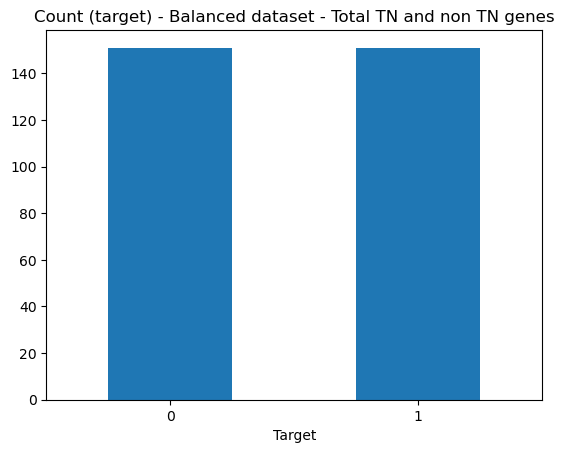

In [34]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [35]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oNI6SXtq,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [36]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.sum(axis=0)

TP53_Missense_Mutation_270_282         38
MAML3_In_Frame_Ins_503_503              3
PIK3CA_Missense_Mutation_1046_1047     65
TP53_Missense_Mutation_173_177         23
TP53_Missense_Mutation_236_258         37
                                     ... 
DAP3_Splice_Region_331_331              1
FAM193A_Silent_1170_1214                0
RCC2_Missense_Mutation_271_278          1
RCC2_Nonsense_Mutation_271_278          0
Target                                151
Length: 104, dtype: int64

In [37]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [38]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED == 0).all()
columns_with_all_zero

TP53_Missense_Mutation_270_282        False
MAML3_In_Frame_Ins_503_503            False
PIK3CA_Missense_Mutation_1046_1047    False
TP53_Missense_Mutation_173_177        False
TP53_Missense_Mutation_236_258        False
                                      ...  
DAP3_Splice_Region_331_331            False
FAM193A_Silent_1170_1214               True
RCC2_Missense_Mutation_271_278        False
RCC2_Nonsense_Mutation_271_278         True
Target                                False
Length: 104, dtype: bool

In [39]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED == 0).all().sum()

27

There are 27 columns containing all zero values.

In [40]:
columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.eq(0).all()]
columns_to_drop

Index(['PIK3CA_Missense_Mutation_418_420', 'ABCG2_Frame_Shift_Del_22_32',
       'GATA3_Frame_Shift_Del_429_434', 'NUP93_Missense_Mutation_14_15',
       'TBX3_In_Frame_Del_210_218', 'PIK3CA_In_Frame_Del_418_420',
       'PTEN_Missense_Mutation_128_131', 'MAP4K3_Missense_Mutation_395_415',
       'TBX3_Frame_Shift_Ins_210_218', 'GATA3_Missense_Mutation_308_335',
       'TP53_Nonsense_Mutation_270_282', 'MAP4K3_Silent_395_415',
       'GATA3_Nonsense_Mutation_308_335', 'ABCG2_Silent_22_32',
       'ABCG2_Missense_Mutation_22_32', 'NUP93_Nonsense_Mutation_14_15',
       'PIK3CA_Nonsense_Mutation_418_420', 'PTEN_Frame_Shift_Ins_128_131',
       'PIK3CA_In_Frame_Ins_102_113', 'TBX3_In_Frame_Ins_210_218',
       'CTCF_In_Frame_Ins_283_288', 'PTEN_Frame_Shift_Ins_317_318',
       'ZNF814_Missense_Mutation_303_311', 'ZNF814_Silent_303_311',
       'TBX3_Splice_Site_210_218', 'FAM193A_Silent_1170_1214',
       'RCC2_Nonsense_Mutation_271_278'],
      dtype='object')

In [41]:
# drop from the dataframe the columns containing all zeros
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop(columns_to_drop, axis=1)
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oNI6SXtq,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
# save the BALANCED dataset
#os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
#occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_q1_withLabels_BALANCED_VariantClass_afterMutClust_ONLYclusters.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap

### Manually split the data in training set and test set 

In [44]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oNI6SXtq,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
# remove the Target column to the occurrence matrix
X = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1)
X 

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PRB2_Missense_Mutation_81_81,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oNI6SXtq,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
# sum each column
X.sum(axis=0)

TP53_Missense_Mutation_270_282        38
MAML3_In_Frame_Ins_503_503             3
PIK3CA_Missense_Mutation_1046_1047    65
TP53_Missense_Mutation_173_177        23
TP53_Missense_Mutation_236_258        37
                                      ..
FHDC1_Frame_Shift_Ins_57_57            2
RBM27_Frame_Shift_Del_719_719          1
ZNF19_Frame_Shift_Ins_280_280          1
DAP3_Splice_Region_331_331             1
RCC2_Missense_Mutation_271_278         1
Length: 76, dtype: int64

In [47]:
# consider the balanced occurrence matrix without the 68 pts I want to keep
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED_selection = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[~occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(total_pts_to_keep)]
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED_selection

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oNI6SXtq,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
# select and store the Target column
y = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target']
y

brca_smc_2018_BR114    0
MBCProject_oNI6SXtq    0
TCGA-A2-A0CP           0
brca_smc_2018_BR248    0
MBCProject_6zfRF2fl    0
                      ..
MBC_72                 0
MBC_183                0
MBC_199                0
MBCProject_LVSjf8h7    0
MBCProject_pktAIxFb    0
Name: Target, Length: 302, dtype: int64

In [49]:
# select the Triple Negative patients
TN_balanced_occ_matrix = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED_selection[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED_selection['Target'] == 1]
TN_balanced_occ_matrix

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_059,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
# select the Non Triple Negative patients 
NONTN_balanced_occ_matrix = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED_selection[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED_selection['Target'] == 0]
NONTN_balanced_occ_matrix

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oNI6SXtq,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-OL-A5RV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0YC,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AR-A1AW,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
NONTN_balanced_occ_matrix_list = NONTN_balanced_occ_matrix.index.tolist()
NONTN_balanced_occ_matrix_df = pd.DataFrame({'Patient': NONTN_balanced_occ_matrix_list})
NONTN_balanced_occ_matrix_df

,Patient
0,brca_smc_2018_BR114
1,MBCProject_oNI6SXtq
2,TCGA-A2-A0CP
3,brca_smc_2018_BR248
4,MBCProject_6zfRF2fl
...,...
111,TCGA-OL-A5RV
112,brca_smc_2018_BR018
113,TCGA-A2-A0YC
114,TCGA-AR-A1AW


In [52]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
NONTN_balanced_occ_matrix_df.to_csv('NONTN_balanced_occ_matrix_df.txt', index=False, sep='\t')

In [53]:
NONTN_balanced_occ_matrix.loc['X11BR022']

TP53_Missense_Mutation_270_282        0
MAML3_In_Frame_Ins_503_503            0
PIK3CA_Missense_Mutation_1046_1047    1
TP53_Missense_Mutation_173_177        0
TP53_Missense_Mutation_236_258        0
                                     ..
RBM27_Frame_Shift_Del_719_719         0
ZNF19_Frame_Shift_Ins_280_280         0
DAP3_Splice_Region_331_331            0
RCC2_Missense_Mutation_271_278        0
Target                                0
Name: X11BR022, Length: 77, dtype: int64

In [54]:
# select 5 TN patients
patient_list_TN = ['BR-M-045', 'TCGA-E9-A244', 'TCGA-AN-A0AL', 'MBC_182', 'TCGA-OL-A5S0']
random_TN_patients_balanced = TN_balanced_occ_matrix.loc[patient_list_TN]
#random_TN_patients_balanced = pd.DataFrame(random_TN_patients_balanced).T
random_TN_patients_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-E9-A244,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-AN-A0AL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBC_182,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
# select three NON TN patients
patient_list_NONTN = ['TCGA-A2-A0YC', 'brca_smc_2018_BR114', 'MBCProject_oNI6SXtq']
random_NONTN_patients_balanced = NONTN_balanced_occ_matrix.loc[patient_list_NONTN]
#random_NONTN_patients_balanced = pd.DataFrame(random_NONTN_patients_balanced).T
random_NONTN_patients_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
TCGA-A2-A0YC,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oNI6SXtq,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Combine the two random samples to create the final dataset
random_tot_pts_balanced = pd.concat([random_TN_patients_balanced, random_NONTN_patients_balanced])
random_tot_pts_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-E9-A244,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-AN-A0AL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBC_182,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-A2-A0YC,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oNI6SXtq,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
specific_TNandNONTN_pts_balanced = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(total_pts_to_keep)]
specific_TNandNONTN_pts_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
PD4133a,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
X18BR002,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [58]:
total_test_pts_occ_matrix_balanced = pd.concat([random_tot_pts_balanced, specific_TNandNONTN_pts_balanced])
total_test_pts_occ_matrix_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-E9-A244,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-AN-A0AL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBC_182,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
y_test = total_test_pts_occ_matrix_balanced['Target']
y_test

BR-M-045               1
TCGA-E9-A244           1
TCGA-AN-A0AL           1
MBC_182                1
TCGA-OL-A5S0           1
                      ..
MBC_72                 0
MBC_183                0
MBC_199                0
MBCProject_LVSjf8h7    0
MBCProject_pktAIxFb    0
Name: Target, Length: 76, dtype: int64

In [60]:
X_test = total_test_pts_occ_matrix_balanced.drop('Target', axis=1)
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PRB2_Missense_Mutation_81_81,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E9-A244,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_182,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
test_pts_list = total_test_pts_occ_matrix_balanced.index.tolist()
test_pts_list

['BR-M-045',
 'TCGA-E9-A244',
 'TCGA-AN-A0AL',
 'MBC_182',
 'TCGA-OL-A5S0',
 'TCGA-A2-A0YC',
 'brca_smc_2018_BR114',
 'MBCProject_oNI6SXtq',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_126',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'MBC_120',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1A

In [62]:
total_training_pts_occ_matrix_balanced = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[~occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(test_pts_list)]
total_training_pts_occ_matrix_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278,Target
TCGA-A2-A0CP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JH,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_61,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
y_train = total_training_pts_occ_matrix_balanced['Target']
y_train

TCGA-A2-A0CP           0
brca_smc_2018_BR248    0
MBCProject_6zfRF2fl    0
TCGA-D8-A1JH           0
MBC_61                 0
                      ..
MBCProject_JpCASlSG    1
MBCProject_QJFdf8hQ    1
MBCProject_epUYsdCE    1
MBCProject_lQtMtjFR    1
MBCProject_rJHBiKTl    1
Name: Target, Length: 226, dtype: int64

In [64]:
X_train = total_training_pts_occ_matrix_balanced.drop('Target', axis=1)
X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PRB2_Missense_Mutation_81_81,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278
TCGA-A2-A0CP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JH,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_61,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X_train.columns[(X_train == 0).all(axis=0)]

Index(['TBX3_Frame_Shift_Del_210_218'], dtype='object')

In [66]:
len(X_train.columns[(X_train == 0).all(axis=0)])

1

There is 1 column in the training dataset with just 0 values. 

In [67]:
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PRB2_Missense_Mutation_81_81,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E9-A244,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_182,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
# SELECT THE PATIENTS

# Extract the row indices as a list
test_pts = X_test.index.tolist()
# Create a new DataFrame with the patient indices
test_pts_df = pd.DataFrame({'Patient': test_pts})
test_pts_df

,Patient
0,BR-M-045
1,TCGA-E9-A244
2,TCGA-AN-A0AL
3,MBC_182
4,TCGA-OL-A5S0
...,...
71,MBC_72
72,MBC_183
73,MBC_199
74,MBCProject_LVSjf8h7


In [69]:
pd.merge(test_pts_df, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_126
3,PD4133a
4,X18BR002
...,...
63,MBC_72
64,MBC_183
65,MBC_199
66,MBCProject_LVSjf8h7


In [70]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['MAML3_In_Frame_Ins_503_503', 'GATA3_Frame_Shift_Ins_308_335',
       'ERBB2_Missense_Mutation_767_777', 'TP53_Frame_Shift_Del_211_218',
       'GATA3_Frame_Shift_Ins_406_408', 'COL17A1_Missense_Mutation_90_106',
       'TP53_Nonsense_Mutation_211_218', 'GATA3_Frame_Shift_Del_406_408',
       'CTCF_Missense_Mutation_283_288', 'TP53_Missense_Mutation_211_218',
       'PTEN_Frame_Shift_Del_317_318', 'TP53_Frame_Shift_Del_191_199',
       'GATA3_Frame_Shift_Del_308_335', 'TP53_In_Frame_Del_191_199',
       'FAM193A_Frame_Shift_Del_1170_1214', 'TP53_Silent_270_282',
       'FOXA1_Missense_Mutation_254_268', 'ZNF208_Missense_Mutation_548_549',
       'TP53_Nonsense_Mutation_236_258', 'TP53_In_Frame_Del_173_177',
       'FOXA1_Nonsense_Mutation_254_268', 'FOXA1_Frame_Shift_Del_254_268',
       'TP53_Frame_Shift_Del_270_282', 'TP53_In_Frame_Del_211_218',
       'PTEN_Nonsense_Mutation_128_131', 'ERBB3_Missense_Mutation_928_928',
       'PIK3R1_In_Frame_Ins_566_578', 'PIK3CA_Silent_1046

In [71]:
len(X_test.columns[(X_test == 0).all(axis=0)])

51

There are 51 columns in the test dataset with just zero values.

In [72]:
y_train.value_counts()

Target
0    113
1    113
Name: count, dtype: int64

In [73]:
y_test.value_counts()

Target
1    38
0    38
Name: count, dtype: int64

In [74]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [75]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PRB2_Missense_Mutation_81_81,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278
TCGA-A2-A0CP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_6zfRF2fl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-D8-A1JH,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_QJFdf8hQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_epUYsdCE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

1

1 column contains NaN values, that is the column with all zero values in the training set.

In [77]:
np.isinf(normalized_X_train).any().any()

False

In [78]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PRB2_Missense_Mutation_81_81,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278
TCGA-A2-A0CP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_6zfRF2fl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-D8-A1JH,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_QJFdf8hQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_epUYsdCE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
normalized_X_train.isna().any().any()

False

In [80]:
normalized_X_train.sum(axis=0)

TP53_Missense_Mutation_270_282        28.0
MAML3_In_Frame_Ins_503_503             3.0
PIK3CA_Missense_Mutation_1046_1047    47.0
TP53_Missense_Mutation_173_177        11.0
TP53_Missense_Mutation_236_258        14.5
                                      ... 
FHDC1_Frame_Shift_Ins_57_57            1.0
RBM27_Frame_Shift_Del_719_719          1.0
ZNF19_Frame_Shift_Ins_280_280          1.0
DAP3_Splice_Region_331_331             1.0
RCC2_Missense_Mutation_271_278         1.0
Length: 76, dtype: float64

In [81]:
normalized_X_train.sum(axis=0).sum()

274.5

In [82]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [83]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PRB2_Missense_Mutation_81_81,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E9-A244,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0AL,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_182,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-OL-A5S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [84]:
np.isinf(normalized_X_test).any().any()

True

In [85]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [86]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

1

1 as the number of zero columns in the training set 

In [87]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PRB2_Missense_Mutation_81_81,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E9-A244,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0AL,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_182,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-OL-A5S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [88]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PRB2_Missense_Mutation_81_81,CHD9_Frame_Shift_Ins_2120_2120,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,RCC2_Missense_Mutation_271_278
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E9-A244,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0AL,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_182,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-OL-A5S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [89]:
np.isinf(normalized_X_test).any().sum()

0

In [90]:
normalized_X_test.isnull().all(axis=0).sum()

0

### Extracting the features

In [91]:
tot_features = normalized_X_train.columns.tolist()
tot_features

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_177',
 'TP53_Missense_Mutation_236_258',
 'GATA3_Frame_Shift_Ins_308_335',
 'PIK3CA_Missense_Mutation_545_546',
 'ERBB2_Missense_Mutation_767_777',
 'GATA3_Splice_Site_308_335',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'TP53_Frame_Shift_Del_211_218',
 'GATA3_Frame_Shift_Ins_406_408',
 'AKT1_Missense_Mutation_17_17',
 'COL17A1_Missense_Mutation_90_106',
 'TP53_Nonsense_Mutation_211_218',
 'TP53_Missense_Mutation_191_199',
 'GATA3_Frame_Shift_Del_406_408',
 'PIK3CA_Missense_Mutation_102_113',
 'GATA3_Frame_Shift_Ins_429_434',
 'TP53_Frame_Shift_Del_236_258',
 'CTCF_Missense_Mutation_283_288',
 'TP53_Missense_Mutation_211_218',
 'SF3B1_Missense_Mutation_700_700',
 'PTEN_Frame_Shift_Del_317_318',
 'TP53_Frame_Shift_Del_191_199',
 'GATA3_Frame_Shift_Del_308_335',
 'KRAS_Missense_Mutation_12_

In [92]:
# Convert the list into a dataframe 
tot_features_df = pd.DataFrame({'Features': tot_features})
tot_features_df

,Features
0,TP53_Missense_Mutation_270_282
1,MAML3_In_Frame_Ins_503_503
2,PIK3CA_Missense_Mutation_1046_1047
3,TP53_Missense_Mutation_173_177
4,TP53_Missense_Mutation_236_258
...,...
71,FHDC1_Frame_Shift_Ins_57_57
72,RBM27_Frame_Shift_Del_719_719
73,ZNF19_Frame_Shift_Ins_280_280
74,DAP3_Splice_Region_331_331


#### Extract only the Hugo Symbol from the features 

In [93]:
tot_features_df['Hugo_Symbol'] = tot_features_df['Features'].str.split('_').str[0]
tot_features_df

,Features,Hugo_Symbol
0,TP53_Missense_Mutation_270_282,TP53
1,MAML3_In_Frame_Ins_503_503,MAML3
2,PIK3CA_Missense_Mutation_1046_1047,PIK3CA
3,TP53_Missense_Mutation_173_177,TP53
4,TP53_Missense_Mutation_236_258,TP53
...,...,...
71,FHDC1_Frame_Shift_Ins_57_57,FHDC1
72,RBM27_Frame_Shift_Del_719_719,RBM27
73,ZNF19_Frame_Shift_Ins_280_280,ZNF19
74,DAP3_Splice_Region_331_331,DAP3


In [94]:
tot_features_df_onlyHugo = tot_features_df[['Hugo_Symbol']]
tot_features_df_onlyHugo

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,TP53
4,TP53
...,...
71,FHDC1
72,RBM27
73,ZNF19
74,DAP3


In [95]:
tot_features_df_onlyHugo.duplicated().sum()

43

In [96]:
# consider just unique genes - drop duplicates 
tot_features_df_onlyHugo_nodup = tot_features_df_onlyHugo.drop_duplicates()
tot_features_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
5,GATA3
7,ERBB2
14,AKT1
15,COL17A1
22,CTCF
24,SF3B1
25,PTEN


In [97]:
tot_features_df_onlyHugo_nodup.shape

(33, 1)

In [98]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
tot_features_df_onlyHugo_nodup.to_csv('6A_features_onlygenes.txt', index=False, sep='\t')

# Lasso Logistic Regression

## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.04873111669228174
Best cross-validation score:  0.7698550724637683


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

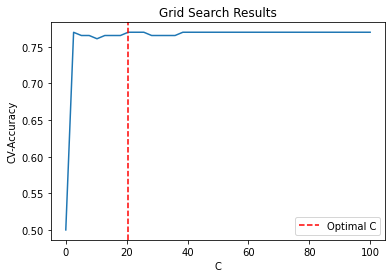

In [91]:
# The code performs a grid search with cross-validation (10-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 10-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear') # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression:  0.04873111669228174 (C=20.5).

In [92]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Mean Cross-Validation Accuracy: 0.7698550724637683
Standard Deviation of Accuracy: 0.05389676480988594
Mean Cross-Validation Precision - 1: 0.7519529745616703
Standard Deviation of Precision - 1: 0.07691160476409453
Mean Cross-Validation Recall - 1: 0.8233201581027668
Standard Deviation of Recall - 1: 0.03769681902787781
Mean Cross-Validation F1-score - 1: 0.7828883512417277
Standard Deviation of F1-score - 1: 0.04180628893267123


In [93]:
precision_scores_1 

array([0.7826087 , 0.69230769, 0.63333333, 0.83333333, 0.81818182])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [94]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Mean Cross-Validation Precision - 0: 0.8023667865315464
Standard Deviation of Precision - 0: 0.028117667001216796
Mean Cross-Validation Recall - 0: 0.7185770750988143
Standard Deviation of Recall - 0: 0.1158419738354449
Mean Cross-Validation F1-score: - 0 0.7531365319263783
Standard Deviation of F1-score: - 0 0.07268927870336536


In [95]:
precision_scores_0

array([0.7826087 , 0.78947368, 0.8       , 0.85714286, 0.7826087 ])

In [96]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=100000, warm_start=True, intercept_scaling=10000.0, C=20.5)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    #shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    #shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

In [ ]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

59 features have a coefficent different from zero.

### Study of the function Lasso

In [101]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=105000, warm_start=True, intercept_scaling=10000.0, C=20.5)   

In [102]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

LogisticRegression(C=20.5, intercept_scaling=10000.0, max_iter=105000,
                   penalty='l1', solver='liblinear', tol=1e-06,
                   warm_start=True)

In [103]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [104]:
y_pred_simple_Lasso

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [105]:
y_test

BR-M-045               1
TCGA-E9-A244           1
TCGA-AN-A0AL           1
MBC_182                1
TCGA-OL-A5S0           1
                      ..
MBC_72                 0
MBC_183                0
MBC_199                0
MBCProject_LVSjf8h7    0
MBCProject_pktAIxFb    0
Name: Target, Length: 76, dtype: int64

In [106]:
print(classification_report(y_test, y_pred_simple_Lasso))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.79      0.79      0.79        38

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [107]:
coef_indexes_simple_Lasso = clf_simple_LogRegr.coef_[0].nonzero()[0]

# Numero delle feature con coefficiente diverso da zero
n_features_simple_Lasso = len(coef_indexes_simple_Lasso)

# Nomi delle feature con coefficiente diverso da zero
feature_names_simple_Lasso = X.columns[coef_indexes_simple_Lasso]


print(f"Numero di feature con coefficiente diverso da zero: {n_features_simple_Lasso}")
print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names_simple_Lasso}")


Numero di feature con coefficiente diverso da zero: 66
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'GATA3_Frame_Shift_Ins_308_335',
       'PIK3CA_Missense_Mutation_545_546', 'ERBB2_Missense_Mutation_767_777',
       'GATA3_Splice_Site_308_335', 'TP53_Nonsense_Mutation_191_199',
       'PIK3CA_Missense_Mutation_541_542', 'PIK3CA_Missense_Mutation_345_345',
       'TP53_Frame_Shift_Del_211_218', 'GATA3_Frame_Shift_Ins_406_408',
       'AKT1_Missense_Mutation_17_17', 'COL17A1_Missense_Mutation_90_106',
       'TP53_Nonsense_Mutation_211_218', 'TP53_Missense_Mutation_191_199',
       'GATA3_Frame_Shift_Del_406_408', 'PIK3CA_Missense_Mutation_102_113',
       'GATA3_Frame_Shift_Ins_429_434', 'TP53_Frame_Shift_Del_236_258',
       'CTCF_Missense_Mutation_283_288', 'TP53_Missense_Mutation_211_21

In [108]:
coef_indexes_simple_Lasso

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54,
       55, 56, 57, 58, 60, 61, 62, 63, 64, 66, 68, 70, 73, 74, 75],
      dtype=int64)

In [109]:
coef_indexes = clf_simple_LogRegr.coef_[0].nonzero()[0]
# Numero delle feature con coefficiente diverso da zero
n_features = len(coef_indexes)
n_features

66

In [110]:
feature_names = X.columns[coef_indexes]
feature_names

Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'GATA3_Frame_Shift_Ins_308_335',
       'PIK3CA_Missense_Mutation_545_546', 'ERBB2_Missense_Mutation_767_777',
       'GATA3_Splice_Site_308_335', 'TP53_Nonsense_Mutation_191_199',
       'PIK3CA_Missense_Mutation_541_542', 'PIK3CA_Missense_Mutation_345_345',
       'TP53_Frame_Shift_Del_211_218', 'GATA3_Frame_Shift_Ins_406_408',
       'AKT1_Missense_Mutation_17_17', 'COL17A1_Missense_Mutation_90_106',
       'TP53_Nonsense_Mutation_211_218', 'TP53_Missense_Mutation_191_199',
       'GATA3_Frame_Shift_Del_406_408', 'PIK3CA_Missense_Mutation_102_113',
       'GATA3_Frame_Shift_Ins_429_434', 'TP53_Frame_Shift_Del_236_258',
       'CTCF_Missense_Mutation_283_288', 'TP53_Missense_Mutation_211_218',
       'SF3B1_Missense_Mutation_700_700', 'PTEN_Frame_Shift_Del_317_318',
       'TP53_Frame_Shift_Del_1

In [111]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_177',
 'TP53_Missense_Mutation_236_258',
 'GATA3_Frame_Shift_Ins_308_335',
 'PIK3CA_Missense_Mutation_545_546',
 'ERBB2_Missense_Mutation_767_777',
 'GATA3_Splice_Site_308_335',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'TP53_Frame_Shift_Del_211_218',
 'GATA3_Frame_Shift_Ins_406_408',
 'AKT1_Missense_Mutation_17_17',
 'COL17A1_Missense_Mutation_90_106',
 'TP53_Nonsense_Mutation_211_218',
 'TP53_Missense_Mutation_191_199',
 'GATA3_Frame_Shift_Del_406_408',
 'PIK3CA_Missense_Mutation_102_113',
 'GATA3_Frame_Shift_Ins_429_434',
 'TP53_Frame_Shift_Del_236_258',
 'CTCF_Missense_Mutation_283_288',
 'TP53_Missense_Mutation_211_218',
 'SF3B1_Missense_Mutation_700_700',
 'PTEN_Frame_Shift_Del_317_318',
 'TP53_Frame_Shift_Del_191_199',
 'GATA3_Frame_Shift_Del_308_335',
 'KRAS_Missense_Mutation_12_

In [112]:
len(feature_names_lista_simple_Lasso)

66

In [113]:
feature_names_lista_simple_Lasso_df = pd.DataFrame({'Lasso features': feature_names_lista_simple_Lasso})
feature_names_lista_simple_Lasso_df

,Lasso features
0,TP53_Missense_Mutation_270_282
1,MAML3_In_Frame_Ins_503_503
2,PIK3CA_Missense_Mutation_1046_1047
3,TP53_Missense_Mutation_173_177
4,TP53_Missense_Mutation_236_258
...,...
61,ZNF195_Missense_Mutation_109_111
62,FAM193A_Missense_Mutation_1170_1214
63,ZNF19_Frame_Shift_Ins_280_280
64,DAP3_Splice_Region_331_331


#### Extract only the Hugo Symbol from the features 

In [114]:
feature_names_lista_simple_Lasso_df['Hugo_Symbol'] = feature_names_lista_simple_Lasso_df['Lasso features'].str.split('_').str[0]
feature_names_lista_simple_Lasso_df

,Lasso features,Hugo_Symbol
0,TP53_Missense_Mutation_270_282,TP53
1,MAML3_In_Frame_Ins_503_503,MAML3
2,PIK3CA_Missense_Mutation_1046_1047,PIK3CA
3,TP53_Missense_Mutation_173_177,TP53
4,TP53_Missense_Mutation_236_258,TP53
...,...,...
61,ZNF195_Missense_Mutation_109_111,ZNF195
62,FAM193A_Missense_Mutation_1170_1214,FAM193A
63,ZNF19_Frame_Shift_Ins_280_280,ZNF19
64,DAP3_Splice_Region_331_331,DAP3


In [115]:
feature_names_lista_simple_Lasso_df_onlyHugo = feature_names_lista_simple_Lasso_df[['Hugo_Symbol']]
feature_names_lista_simple_Lasso_df_onlyHugo

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,TP53
4,TP53
...,...
61,ZNF195
62,FAM193A
63,ZNF19
64,DAP3


In [116]:
feature_names_lista_simple_Lasso_df_onlyHugo.duplicated().sum()

41

In [117]:
# consider just unique genes - drop duplicates 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup = feature_names_lista_simple_Lasso_df_onlyHugo.drop_duplicates()
feature_names_lista_simple_Lasso_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
5,GATA3
7,ERBB2
14,AKT1
15,COL17A1
22,CTCF
24,SF3B1
25,PTEN


In [118]:
feature_names_lista_simple_Lasso_df_onlyHugo_nodup.shape

(25, 1)

In [119]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup.to_csv('6A_features_onlygenes_LASSO.txt', index=False, sep='\t')

## Evaluate the model with classification metrics 

In [107]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.7894736842105263


In [108]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[30  8]
 [ 8 30]]


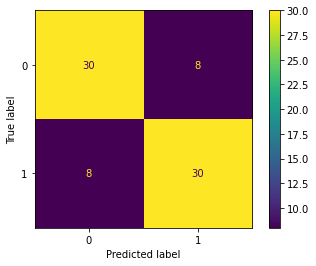

In [109]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr, normalized_X_test, y_test)

In [110]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [111]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.7894736842105263


In [112]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [113]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.7894736842105263


In [114]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [115]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.7894736842105263


In [116]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [117]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

30

In [118]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

30

In [119]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

8

In [120]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

8

In [121]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.5789473684210527


In [122]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_177',
 'TP53_Missense_Mutation_236_258',
 'GATA3_Frame_Shift_Ins_308_335',
 'PIK3CA_Missense_Mutation_545_546',
 'ERBB2_Missense_Mutation_767_777',
 'GATA3_Splice_Site_308_335',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'TP53_Frame_Shift_Del_211_218',
 'GATA3_Frame_Shift_Ins_406_408',
 'AKT1_Missense_Mutation_17_17',
 'COL17A1_Missense_Mutation_90_106',
 'TP53_Nonsense_Mutation_211_218',
 'TP53_Missense_Mutation_191_199',
 'GATA3_Frame_Shift_Del_406_408',
 'PIK3CA_Missense_Mutation_102_113',
 'GATA3_Frame_Shift_Ins_429_434',
 'TP53_Frame_Shift_Del_236_258',
 'CTCF_Missense_Mutation_283_288',
 'TP53_Missense_Mutation_211_218',
 'SF3B1_Missense_Mutation_700_700',
 'PTEN_Frame_Shift_Del_317_318',
 'TP53_Frame_Shift_Del_191_199',
 'GATA3_Frame_Shift_Del_308_335',
 'KRAS_Missense_Mutation_12_

In [123]:
len(feature_names_lista_simple_Lasso)

66

# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  7.701538461538462
Best cross-validation score:  0.787632850241546


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

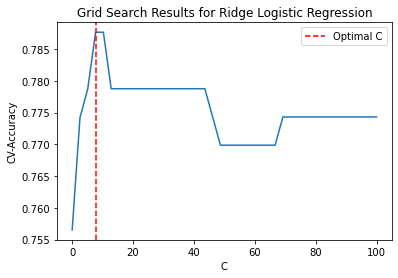

In [124]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 0.13 (C=7.70).

### Compute the classification metrics on the cross-validation results 

In [125]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.787632850241546
Standard Deviation of Accuracy: 0.04561123333575348
Mean Cross-Validation Precision - 1: 0.7767708233795191
Standard Deviation of Precision - 1: 0.06507503496185818
Mean Cross-Validation Recall - 1: 0.8142292490118578
Standard Deviation of Recall - 1: 0.042954080590979146
Mean Cross-Validation F1-score - 1: 0.7933850531214084
Standard Deviation of F1-score - 1: 0.04232756933366389


In [126]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.8047046965239184
Standard Deviation of Precision - 0: 0.03949529180167389
Mean Cross-Validation Recall - 0: 0.7624505928853755
Standard Deviation of Recall - 0: 0.07794081559340614
Mean Cross-Validation F1-score: - 0 0.7810968270017816
Standard Deviation of F1-score: - 0 0.05000528166797682


## Ridge on the test set

In [127]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=7.7)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.77      0.79      0.78        38

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76

Numero di feature con coefficiente diverso da zero: 75
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'GATA3_Frame_Shift_Ins_308_335',
       'PIK3CA_Missense_Mutation_545_546', 'ERBB2_Missense_Mutation_767_777',
       'GATA3_Splice_Site_308_335', 'TP53_Nonsense_Mutation_191_199',
       'PIK3CA_Missense_Mutation_541_542', 'PIK3CA_Missense_Mutation_345_345',
       'TP53_Frame_Shift_Del_211_218', 'GATA3_Frame_Shift_Ins_406_408',
       'AKT1_Missense_Mutation_17_17', 'CO

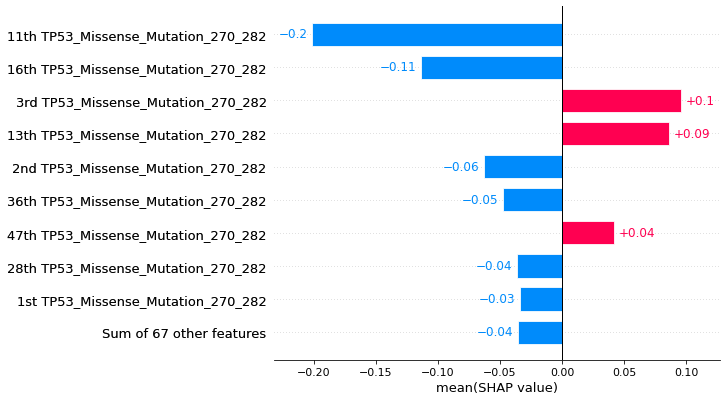

In [128]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [129]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=7.7)

In [130]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=7.7, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [131]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [132]:
y_pred_simple_Ridge

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [133]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.7763157894736842


In [134]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[29  9]
 [ 8 30]]


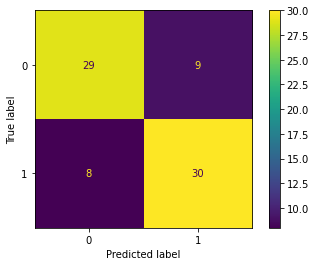

In [135]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Ridge, normalized_X_test, y_test)

In [136]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.7692307692307693


In [137]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.7894736842105263


In [138]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.7792207792207793


In [139]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

30

In [140]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

29

In [141]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

9

In [142]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

8

In [143]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.5528230328172892


# Full Logistic Regression

## Cross-validation

In [144]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty='none')

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.7826087  0.71111111 0.68888889 0.86666667 0.82222222]
Mean CV Accuracy: 0.7742995169082126


In [145]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.7742995169082126
Standard Deviation of Accuracy: 0.06661091276412243
Mean Cross-Validation Precision - 1: 0.7559503105590062
Standard Deviation of Precision - 1: 0.09057752861022789
Mean Cross-Validation Recall - 1: 0.8320158102766799
Standard Deviation of Recall - 1: 0.05027692843053861
Mean Cross-Validation F1-score - 1: 0.7882507244308486
Standard Deviation of F1-score - 1: 0.05408437414803145


In [146]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.8104106280193237
Standard Deviation of Precision - 0: 0.045439681321667195
Mean Cross-Validation Recall - 0: 0.7189723320158103
Standard Deviation of Recall - 0: 0.13105851585436934
Mean Cross-Validation F1-score: - 0 0.7560688571906968
Standard Deviation of F1-score: - 0 0.08563917867656415


## Full Logistic Regression on the test set 

In [147]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty='none') 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [148]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.79      0.79      0.79        38

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



### Study of the full logistic regression function

In [149]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty='none')

In [150]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [151]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [152]:
y_pred_full_logreg

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [153]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.7894736842105263


In [154]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[30  8]
 [ 8 30]]


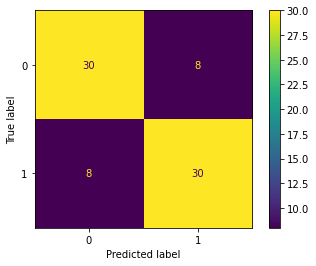

In [155]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Full, normalized_X_test, y_test)

In [156]:
print("Precision ", precision(cm_full_logreg))

Precision  0.7894736842105263


In [157]:
print("Recall:", recall(cm_full_logreg))

Recall: 0.7894736842105263


In [158]:
print("F1:", f1(cm_full_logreg))

F1: 0.7894736842105263


In [159]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

30

In [160]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

30

In [161]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

8

In [162]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

8

In [163]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

MCC: 0.5789473684210527


# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 2.5738461538461537
Best cv accuracy: 0.7787439613526569


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

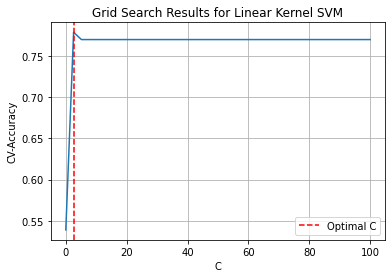

In [164]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 2.57

### Compute the classification metrics on the cross-validation results

In [165]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.7787439613526569
Standard Deviation of Accuracy: 0.031486320264348465
Mean Cross-Validation Precision - 1: 0.752969696969697
Standard Deviation of Precision - 1: 0.054861843342279046
Mean Cross-Validation Recall - 1: 0.8411067193675889
Standard Deviation of Recall - 1: 0.04382898427076397
Mean Cross-Validation F1-score - 1: 0.7920376432078559
Standard Deviation of F1-score - 1: 0.024368836316304054


In [166]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.8217598343685302
Standard Deviation of Precision - 0: 0.03152825050801157
Mean Cross-Validation Recall - 0: 0.7181818181818181
Standard Deviation of Recall - 0: 0.0863941571055447
Mean Cross-Validation F1-score: - 0 0.7621295310156999
Standard Deviation of F1-score: - 0 0.045135445307103915


# Linear SVM on the test set 

In [167]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=2.57)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [168]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.78      0.74      0.76        38

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



### Study of the Linear SVM function

In [169]:
clf_linear_svm = SVC(kernel='linear', C=2.57)

In [170]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=2.57, kernel='linear')

In [171]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [172]:
y_pred_linear_svm

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [173]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.7631578947368421


In [174]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[30  8]
 [10 28]]


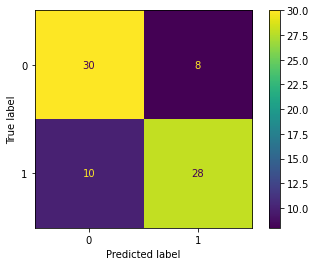

In [175]:
# Plot test confusion matrix
plot_confusion_matrix(clf_linear_svm, normalized_X_test, y_test)

In [176]:
print("Precision ", precision(cm_linear_svm))

Precision  0.7777777777777778


In [177]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.7368421052631579


In [178]:
print("F1:", f1(cm_linear_svm))

F1: 0.7567567567567567


In [179]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

28

In [180]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

30

In [181]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

8

In [182]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

10

In [183]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.5270462766947298


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [184]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 25.00075
Best degree: 4
Best coef0: 5.0
Best cv accuracy: 0.7789371980676328


### Compute the classification metrics on the cross-validation results

In [185]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.7789371980676328
Standard Deviation of Accuracy: 0.040988964589160334
Mean Cross-Validation Precision - 1: 0.7614624505928854
Standard Deviation of Precision - 1: 0.05999809630231755
Mean Cross-Validation Recall - 1: 0.8237154150197629
Standard Deviation of Recall - 1: 0.06044200744226174
Mean Cross-Validation F1-score - 1: 0.7884067458905571
Standard Deviation of F1-score - 1: 0.037120894404936454


In [186]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.8110144927536233
Standard Deviation of Precision - 0: 0.04733163782992114
Mean Cross-Validation Recall - 0: 0.7359683794466403
Standard Deviation of Recall - 0: 0.09240562337519344
Mean Cross-Validation F1-score: - 0 0.7666555072302504
Standard Deviation of F1-score: - 0 0.05230939500302108


## Polynomial SVM on the test set 

In [187]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=25, degree=4, coef0=5)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [188]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.78      0.76      0.77        38

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



### Study of the Polynomial SVM function

In [189]:
clf_poly_svm = SVC(kernel='poly', C=25, degree=4, coef0=5)

In [190]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=25, coef0=5, degree=4, kernel='poly')

In [191]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [192]:
y_pred_poly_svm

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [193]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.7763157894736842


In [194]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[30  8]
 [ 9 29]]


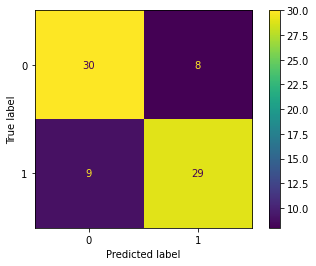

In [195]:
# Plot test confusion matrix
plot_confusion_matrix(clf_poly_svm, normalized_X_test, y_test)

In [196]:
print("Precision ", precision(cm_poly_svm))

Precision  0.7837837837837838


In [197]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.7631578947368421


In [198]:
print("F1:", f1(cm_poly_svm))

F1: 0.7733333333333334


In [199]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

29

In [200]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

30

In [201]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

8

In [202]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

9

In [203]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.5528230328172892


# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [204]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 100.0
Best gamma: 0.001
Best cv accuracy: 0.7610628019323672


### Compute the classification metrics on the cross-validation results

In [205]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.7610628019323672
Standard Deviation of Accuracy: 0.021659758483790648
Mean Cross-Validation Precision - 1: 0.7159163824681066
Standard Deviation of Precision - 1: 0.023301174411734682
Mean Cross-Validation Recall - 1: 0.8671936758893282
Standard Deviation of Recall - 1: 0.06212453029055651
Mean Cross-Validation F1-score - 1: 0.7829547154068373
Standard Deviation of F1-score - 1: 0.026868798127397637


In [206]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.838609022556391
Standard Deviation of Precision - 0: 0.06102893783234632
Mean Cross-Validation Recall - 0: 0.6553359683794466
Standard Deviation of Recall - 0: 0.03931962091840597
Mean Cross-Validation F1-score: - 0 0.7329769105151975
Standard Deviation of F1-score: - 0 0.015924478471026602


### Radial SVM on the test set 

In [207]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=100, gamma=0.001)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [208]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.74      0.66      0.69        38
           1       0.69      0.76      0.72        38

    accuracy                           0.71        76
   macro avg       0.71      0.71      0.71        76
weighted avg       0.71      0.71      0.71        76



### Study of the Radial SVM function

In [209]:
clf_radial_svm = SVC(kernel='rbf', C=100, gamma=0.001)

In [210]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=100, gamma=0.001)

In [211]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [212]:
y_pred_radial_svm

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [213]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.7105263157894737


In [214]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[25 13]
 [ 9 29]]


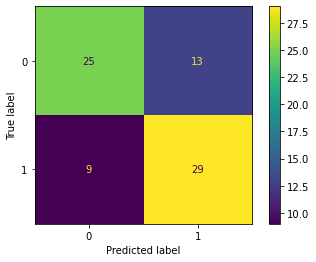

In [215]:
# Plot test confusion matrix
plot_confusion_matrix(clf_radial_svm, normalized_X_test, y_test)

In [216]:
print("Precision ", precision(cm_radial_svm))

Precision  0.6904761904761905


In [217]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.7631578947368421


In [218]:
print("F1:", f1(cm_radial_svm))

F1: 0.725


In [219]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

29

In [220]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

25

In [221]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

13

In [222]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

9

In [223]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.4234048992199705


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [224]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40, 45, 50],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40,
                                          45, 50],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 15, 'n_estimators': 200}
Best cross-validation score (accuracy): 0.7656038647342995
OOB score of best model: 0.7787610619469026


### Compute the classification metrics on the cross-validation results 

In [225]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.7656038647342995
Standard Deviation of Accuracy: 0.03787439613526569
Mean Cross-Validation Precision - 1: 0.7462947379356917
Standard Deviation of Precision - 1: 0.061853349618093904
Mean Cross-Validation Recall - 1: 0.8229249011857707
Standard Deviation of Recall - 1: 0.06385081583022503
Mean Cross-Validation F1-score - 1: 0.778512754404469
Standard Deviation of F1-score - 1: 0.029006409377729463


In [226]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.8058687628161312
Standard Deviation of Precision - 0: 0.04011907081297181
Mean Cross-Validation Recall - 0: 0.709090909090909
Standard Deviation of Recall - 0: 0.10966082442954138
Mean Cross-Validation F1-score: - 0 0.7473704223704223
Standard Deviation of F1-score: - 0 0.05883665043021152


In [227]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=15, n_estimators=200, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [228]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.74      0.76      0.75        38

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



### Study the Random Forest function

In [229]:
clf_rf = RandomForestClassifier(max_features=15, n_estimators=200, random_state=123)

In [230]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=15, n_estimators=200, random_state=123)

In [231]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [232]:
y_pred_rf

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [233]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.75


In [234]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[28 10]
 [ 9 29]]


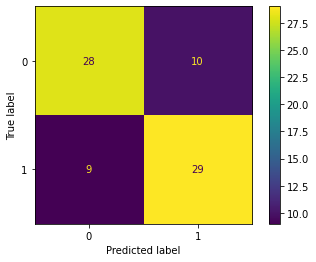

In [235]:
# Plot test confusion matrix
plot_confusion_matrix(clf_rf, normalized_X_test, y_test)

In [236]:
print("Precision ", precision(cm_rf))

Precision  0.7435897435897436


In [237]:
print("Recall:", recall(cm_rf))

Recall: 0.7631578947368421


In [238]:
print("F1:", f1(cm_rf))

F1: 0.7532467532467534


In [239]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

29

In [240]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

28

In [241]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

10

In [242]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

9

In [243]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.5001732201680236


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [244]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

Best Learning Rate: 0.01
Best Max Depth: 8
Best Number of Trees: 200
Best Accuracy: 0.738840579710145


### Compute the classification metrics on the cross-validation results 

In [245]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.738840579710145
Standard Deviation of Accuracy: 0.06063723778483956
Mean Cross-Validation Precision - 1: 0.8195238095238094
Standard Deviation of Precision - 1: 0.08319580488289886
Mean Cross-Validation Recall - 1: 0.6189723320158103
Standard Deviation of Recall - 1: 0.11470216804796332
Mean Cross-Validation F1-score - 1: 0.6979514122338852
Standard Deviation of F1-score - 1: 0.08488640842361612


In [246]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.6984632034632035
Standard Deviation of Precision - 0: 0.061246630242689955
Mean Cross-Validation Recall - 0: 0.8596837944664031
Standard Deviation of Recall - 0: 0.07375540671492996
Mean Cross-Validation F1-score: - 0 0.7678798612616828
Standard Deviation of F1-score: - 0 0.04853125166727936


In [249]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.01, n_estimators=200, max_depth=8, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [250]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        38
           1       0.78      0.66      0.71        38

    accuracy                           0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.74      0.74      0.74        76



### Study the eXtreme Gradient Boosting function

In [251]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.01, n_estimators=200, max_depth=8, random_state=123) 

In [252]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [253]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [254]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.7368421052631579


In [255]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[31  7]
 [13 25]]


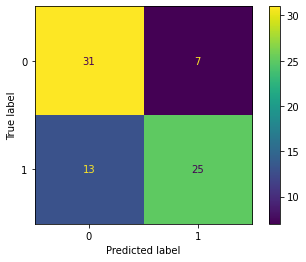

In [256]:
# Plot test confusion matrix
plot_confusion_matrix(clf_xgb, normalized_X_test, y_test)

In [257]:
print("Precision ", precision(cm_xgb))

Precision  0.78125


In [258]:
print("Recall:", recall(cm_xgb))

Recall: 0.6578947368421053


In [259]:
print("F1:", f1(cm_xgb))

F1: 0.7142857142857143


In [260]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

25

In [261]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

31

In [262]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

7

In [263]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

13

In [264]:
print("MCC:", mcc(y_test, y_pred_xgb))

MCC: 0.4797016118001235
